In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
forest_df = pd.read_csv('forestfires.csv')

In [3]:
forest_df.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [4]:
forest_df.tail(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
507,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small
509,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,...,0,0,0,0,0,0,0,0,0,small
510,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
511,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,...,0,0,0,0,0,0,0,0,0,small
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [5]:
forest_df.shape

(517, 31)

In [6]:
forest_df.columns


Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

# EDA

In [7]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
forest_df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
forest_df.isna().sum().sum()

0

In [10]:
#No Missing value found

# Data Visualization

<AxesSubplot:xlabel='month', ylabel='count'>

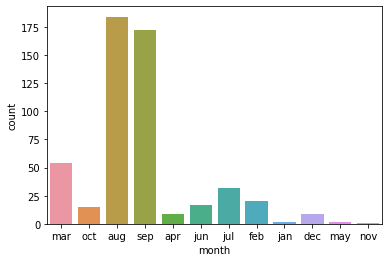

In [11]:
sns.countplot(data=forest_df,x=forest_df['month'])

<AxesSubplot:xlabel='day', ylabel='count'>

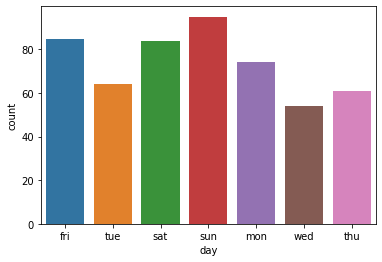

In [12]:
sns.countplot(data=forest_df,x=forest_df['day'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Scatter Plot between Temperature and Area'}, xlabel='Tempratue', ylabel='Area'>

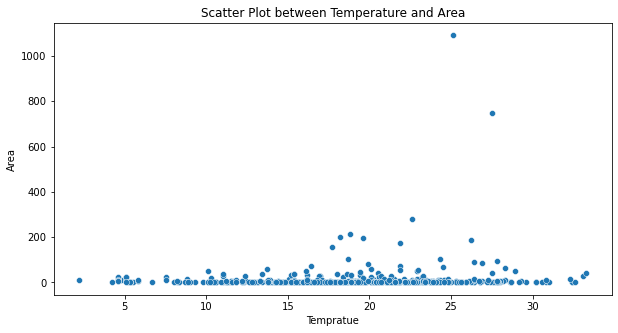

In [13]:
#Scatter plot between Area and Temperature
plt.figure(figsize=(10,5))
plt.xlabel('Tempratue')
plt.ylabel('Area')
plt.title('Scatter Plot between Temperature and Area')
sns.scatterplot(forest_df['temp'],forest_df['area'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

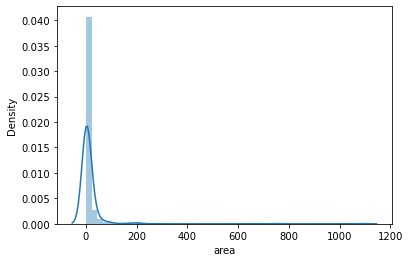

In [14]:
sns.distplot(forest_df['area'])

<AxesSubplot:>

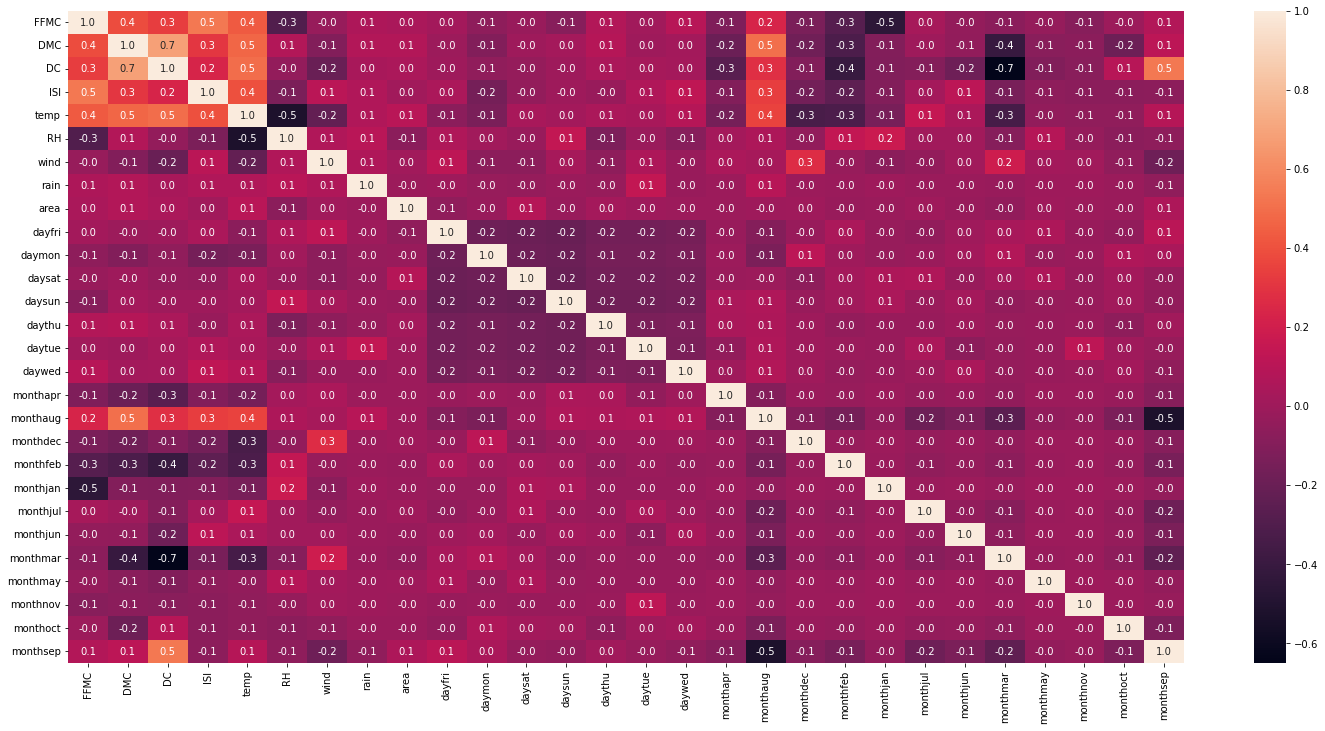

In [15]:
plt.figure(figsize=(25,12))
sns.heatmap(forest_df.corr(),annot=True,fmt='0.1f')

<AxesSubplot:xlabel='month', ylabel='temp'>

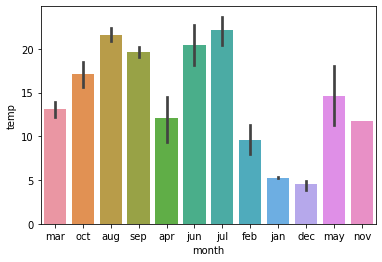

In [16]:
sns.barplot(data=forest_df,x=forest_df['month'],y=forest_df['temp'])

<AxesSubplot:xlabel='month', ylabel='rain'>

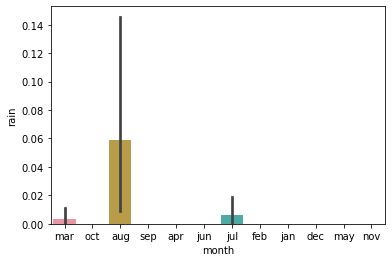

In [17]:
sns.barplot(data=forest_df,x=forest_df['month'],y=forest_df['rain'])

<AxesSubplot:xlabel='month', ylabel='RH'>

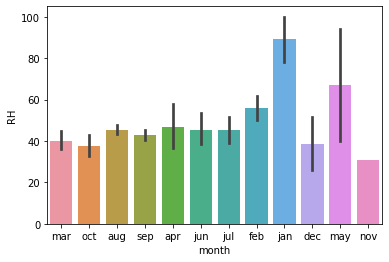

In [18]:
sns.barplot(data=forest_df,x=forest_df['month'],y=forest_df['RH'])

<AxesSubplot:xlabel='month', ylabel='wind'>

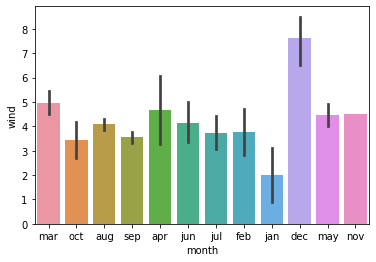

In [19]:
sns.barplot(data=forest_df,x=forest_df['month'],y=forest_df['wind'])

<AxesSubplot:xlabel='temp', ylabel='area'>

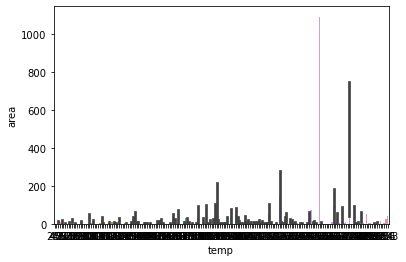

In [20]:
sns.barplot(data=forest_df,x=forest_df['temp'],y=forest_df['area'])

<AxesSubplot:xlabel='size_category', ylabel='temp'>

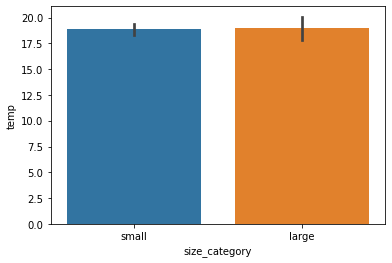

In [21]:
sns.barplot(data=forest_df,x=forest_df['size_category'],y=forest_df['temp'])

<AxesSubplot:xlabel='size_category', ylabel='area'>

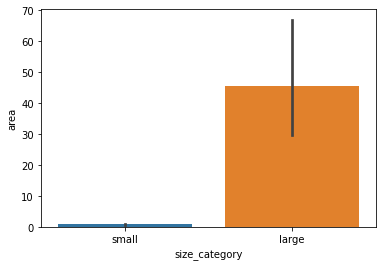

In [22]:
sns.barplot(data=forest_df,x=forest_df['size_category'],y=forest_df['area'])

<AxesSubplot:xlabel='size_category', ylabel='RH'>

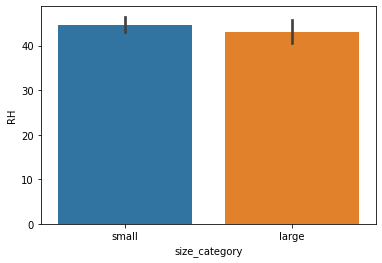

In [23]:
sns.barplot(data=forest_df,x=forest_df['size_category'],y=forest_df['RH'])

<AxesSubplot:xlabel='size_category', ylabel='wind'>

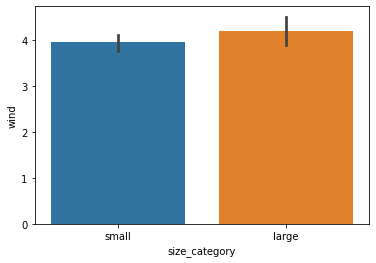

In [24]:
sns.barplot(data=forest_df,x=forest_df['size_category'],y=forest_df['wind'])

<AxesSubplot:xlabel='size_category', ylabel='rain'>

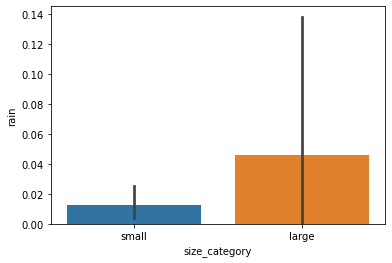

In [25]:
sns.barplot(data=forest_df,x=forest_df['size_category'],y=forest_df['rain'])

# Data Prepocessing

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Normalization of the features
minmax = MinMaxScaler()

# FFMC, DMC, DC, ISI, RH
forest_df['FFMC'] = minmax.fit_transform(np.array(forest_df['FFMC']).reshape(-1, 1))
forest_df['DMC'] = minmax.fit_transform(np.array(forest_df['DMC']).reshape(-1, 1))
forest_df['DC'] = minmax.fit_transform(np.array(forest_df['DC']).reshape(-1, 1))
forest_df['ISI'] = minmax.fit_transform(np.array(forest_df['ISI']).reshape(-1, 1))
forest_df['RH'] = minmax.fit_transform(np.array(forest_df['RH']).reshape(-1, 1))

In [28]:
forest_df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,0.811613,0.191592,0.771315,0.033868,27.8,0.200000,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,0.811613,0.191592,0.771315,0.033868,21.9,0.658824,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,0.811613,0.191592,0.771315,0.033868,21.2,0.647059,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,0.976774,0.499311,0.711622,0.201426,25.6,0.317647,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [29]:
forest_df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.928318,0.378264,0.633329,0.160814,18.889168,0.344567,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,0.071227,0.220698,0.290918,0.081274,5.806625,0.191970,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,0.000000,0.000000,0.000000,0.000000,2.200000,0.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922581,0.232598,0.504046,0.115865,15.500000,0.211765,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.940645,0.369400,0.769673,0.149733,19.300000,0.317647,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.957419,0.486906,0.827958,0.192513,22.800000,0.447059,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,33.300000,1.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
y= forest_df['size_category']
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [31]:
x= forest_df.drop(columns='size_category')
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,mar,fri,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,oct,tue,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,oct,sat,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,mar,fri,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,mar,sun,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,0.811613,0.191592,0.771315,0.033868,27.8,0.200000,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,0.811613,0.191592,0.771315,0.033868,21.9,0.658824,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,0.811613,0.191592,0.771315,0.033868,21.2,0.647059,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,0.976774,0.499311,0.711622,0.201426,25.6,0.317647,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
x.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],
      dtype='object')

In [33]:
x.drop(columns=['month','day'],inplace=True)
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,27.8,0.200000,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,0.811613,0.191592,0.771315,0.033868,21.9,0.658824,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,0.811613,0.191592,0.771315,0.033868,21.2,0.647059,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,0.976774,0.499311,0.711622,0.201426,25.6,0.317647,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting the dataset into training and testing

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((413, 28), (104, 28), (413,), (104,))

In [37]:
x_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
386,0.926452,0.329428,0.870881,0.203209,20.6,0.470588,5.4,0.0,24.59,0,...,0,0,0,0,0,0,0,0,0,1
56,0.923871,0.274294,0.847074,0.112299,17.8,0.564706,4.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
457,0.941935,0.655755,0.736484,0.139037,19.9,0.411765,4.0,0.0,82.75,0,...,0,0,0,0,0,0,0,0,0,0
60,0.910968,0.172984,0.110590,0.171123,11.5,0.282353,5.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
229,0.948387,0.278084,0.554591,0.212121,16.4,0.329412,4.0,0.0,71.30,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.935484,0.162646,0.105430,0.222816,15.8,0.141176,7.6,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
277,0.860645,0.083735,0.400844,0.046346,4.6,0.070588,8.5,0.0,10.73,0,...,1,0,0,0,0,0,0,0,0,0
9,0.952258,0.299449,0.810015,0.126560,22.8,0.294118,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
359,0.952258,0.416609,0.916852,0.181818,21.1,0.282353,2.2,0.0,8.12,1,...,0,0,0,0,0,0,0,0,0,1


In [38]:
x_test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
213,0.889032,0.176085,0.112466,0.089127,11.0,0.364706,5.8,0.0,27.35,0,...,0,0,0,0,0,1,0,0,0,0
435,0.930323,0.288077,0.432391,0.099822,23.8,0.423529,1.8,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,0
343,0.939355,0.444521,0.937258,0.133690,15.9,0.423529,4.5,0.0,2.18,0,...,0,0,0,0,0,0,0,0,0,1
230,0.957419,0.455548,0.811188,0.163993,26.4,0.070588,4.5,0.0,88.49,0,...,0,0,0,0,0,0,0,0,0,1
171,0.863226,0.307719,0.705641,0.117647,17.4,0.411765,4.0,0.0,2.69,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.963871,0.497243,0.836754,0.144385,29.6,0.141176,2.7,0.0,1.46,0,...,0,0,0,0,0,0,0,0,0,1
49,0.889032,0.176085,0.112466,0.089127,11.0,0.364706,5.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
100,0.938065,0.486906,0.696024,0.188948,19.8,0.282353,5.4,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
153,0.975484,0.289456,0.802627,0.283422,20.1,0.376471,4.9,0.0,1.46,1,...,0,0,0,0,0,0,0,0,0,1


# SVM using differnt Kernal

In [39]:
from sklearn.svm import SVC

In [40]:
# Using kernal=linear

In [41]:
model_svm_linear = SVC(kernel = "linear")
model_svm_linear.fit(x_train,y_train)


SVC(kernel='linear')

In [42]:
pred_test_linear = model_svm_linear.predict(x_test)

In [43]:
np.mean(pred_test_linear==y_test) 

0.9807692307692307

In [44]:
#Accuracy is 98%

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [46]:
acc = accuracy_score(y_test, pred_test_linear) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred_test_linear)

Accuracy = 98.07692307692307


array([[30,  0],
       [ 2, 72]], dtype=int64)

In [47]:
# Using kernal=poly

In [48]:
model_svm_poly = SVC(kernel = "poly")
model_svm_poly.fit(x_train,y_train)


SVC(kernel='poly')

In [49]:
pred_test_poly = model_svm_poly.predict(x_test)

In [50]:
np.mean(pred_test_poly==y_test) 

0.8653846153846154

In [51]:
#Accuracy is 86.5%

In [52]:
acc = accuracy_score(y_test, pred_test_poly) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred_test_poly)

Accuracy = 86.53846153846155


array([[16, 14],
       [ 0, 74]], dtype=int64)

In [53]:
#SVM using kernal=rbf

In [54]:
model_svm_rbf = SVC(kernel = "rbf")
model_svm_rbf.fit(x_train,y_train)


SVC()

In [55]:
pred_test_rbf = model_svm_rbf.predict(x_test)

In [56]:
np.mean(pred_test_rbf==y_test) 

0.9615384615384616

In [57]:
#Accuracy is 96%

In [58]:
acc = accuracy_score(y_test, pred_test_rbf) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred_test_rbf)

Accuracy = 96.15384615384616


array([[26,  4],
       [ 0, 74]], dtype=int64)

In [59]:
#SVM using kernal=sigmoid

In [60]:
model_svm_sigmoid = SVC(kernel = "sigmoid")
model_svm_sigmoid.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [61]:
pred_test_sigmoid = model_svm_sigmoid.predict(x_test)

In [62]:
np.mean(pred_test_sigmoid==y_test) 

0.9326923076923077

In [63]:
#Accuracy is 93%

In [64]:
acc = accuracy_score(y_test, pred_test_sigmoid) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred_test_sigmoid)

Accuracy = 93.26923076923077


array([[23,  7],
       [ 0, 74]], dtype=int64)

# Using Grid Search

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
clf = SVC()
param_grid = [{'kernel':['linear'],'gamma':[100,50,0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001, 0.0001],
                          'gamma': [100, 50, 0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['linear']}])

In [67]:
gsv.best_params_ , gsv.best_score_ 

({'C': 0.1, 'gamma': 100, 'kernel': 'linear'}, 0.9976190476190476)

In [68]:
clf = SVC(C= 0.1, gamma = 100,kernel='linear')
clf.fit(x_train , y_train)
y_pred_train= clf.predict(x_train)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train))

Accuracy = 99.75786924939467
[[109   0]
 [  1 303]]


In [69]:
y_pred_test = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_test, y_pred_test))

Accuracy = 97.11538461538461
[[29  1]
 [ 2 72]]
